# Check building parameters for graphs.

In [11]:
import athena as ath
from athena.utils.default_configs import get_default_config
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
path_2_file = '/Users/ast/Documents/GitHub/datasets/ER/raw_data/zurich.pkl'
with open(path_2_file, 'rb') as f:
    zh_so = pickle.load(f)

In [3]:
# Shorten name
so = zh_so

In [4]:
print(
    so.spl['Count_Cells'].min(),
    so.spl['Count_Cells'].mean(),
    so.spl['Count_Cells'].max(),
    sep="\n"
)

10
1162.4438040345822
3674


In [5]:
spl_1 = so.spl.index[so.spl['Count_Cells'] == 10].to_list()[0]
spl_3 = so.spl.index[so.spl['Count_Cells'] == 3674].to_list()[0]
spl_2 = so.spl.index[so.spl['Count_Cells'].between(1100, 1200)].values[0]

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [6]:
# Clear graphs
so.G.clear()

In [7]:
sample_ids = so.spl.index.values
so.obs[sample_ids[0]]

core meta_id      meta_label cell_type_id cell_type  \
cell_id                                                                  
1        slide_49_By3x1       1         B cells            1    immune   
2        slide_49_By3x1       1         B cells            1    immune   
3        slide_49_By3x1       1         B cells            1    immune   
4        slide_49_By3x1       2   B and T cells            1    immune   
5        slide_49_By3x1       3          T cell            1    immune   
...                 ...     ...             ...          ...       ...   
1530     slide_49_By3x1      21  Epithelial low            4     tumor   
1531     slide_49_By3x1       3          T cell            1    immune   
1532     slide_49_By3x1      11  Fibronectin Hi            3   stromal   
1533     slide_49_By3x1      21  Epithelial low            4     tumor   
1534     slide_49_By3x1      11  Fibronectin Hi            3   stromal   

        phenograph_cluster  CellId                           id  
cell_id                                                          
1                        5       1     ZTMA208_slide_49_By3x1_1  
2                        5       2     ZTMA208_slide_49_By3x1_2  
3                        5       3     ZTMA208_slide_49_By3x1_3  
4                       18       4     ZTMA208_slide_49_By3x1_4  
5                        1       5     ZTMA208_slide_49_By3x1_5  
...                    ...     ...                          ...  
1530                     8    1480  ZTMA208_slide_49_By3x1_1480  
1531                     1    1481  ZTMA208_slide_49_By3x1_1481  
1532                     2    1482  ZTMA208_slide_49_By3x1_1482  
1533                     8    1483  ZTMA208_slide_49_By3x1_1483  
1534                     2    1484  ZTMA208_slide_49_By3x1_1484  

[1484 rows x 8 columns]

In [14]:

radius_cfg = get_default_config(
    builder_type = 'radius',
    build_concept_graph = False
)

In [15]:
radius_cfg

{'builder_type': 'radius',
 'builder_params': {'radius': 36,
  'mode': 'connectivity',
  'metric': 'minkowski',
  'p': 2,
  'metric_params': None,
  'include_self': True,
  'n_jobs': -1},
 'coordinate_keys': ['x', 'y'],
 'mask_key': 'cellmasks',
 'build_and_attribute': False,
 'build_concept_graph': False}

In [24]:
# Build graph for every sample an
spls = [spl_1, spl_2, spl_3]
radiuses = [50, 40, 30, 20, 10]

for spl in spls:
    ath.pp.extract_centroids(so, spl, mask_key='cellmasks')

    for radius in radiuses:
        radius_cfg["builder_params"]["radius"] = radius
        ath.graph.build_graph(so, 
            spl, 
            builder_type='radius',
            config=radius_cfg, 
            key_added=f"radius_{radius}"
        )


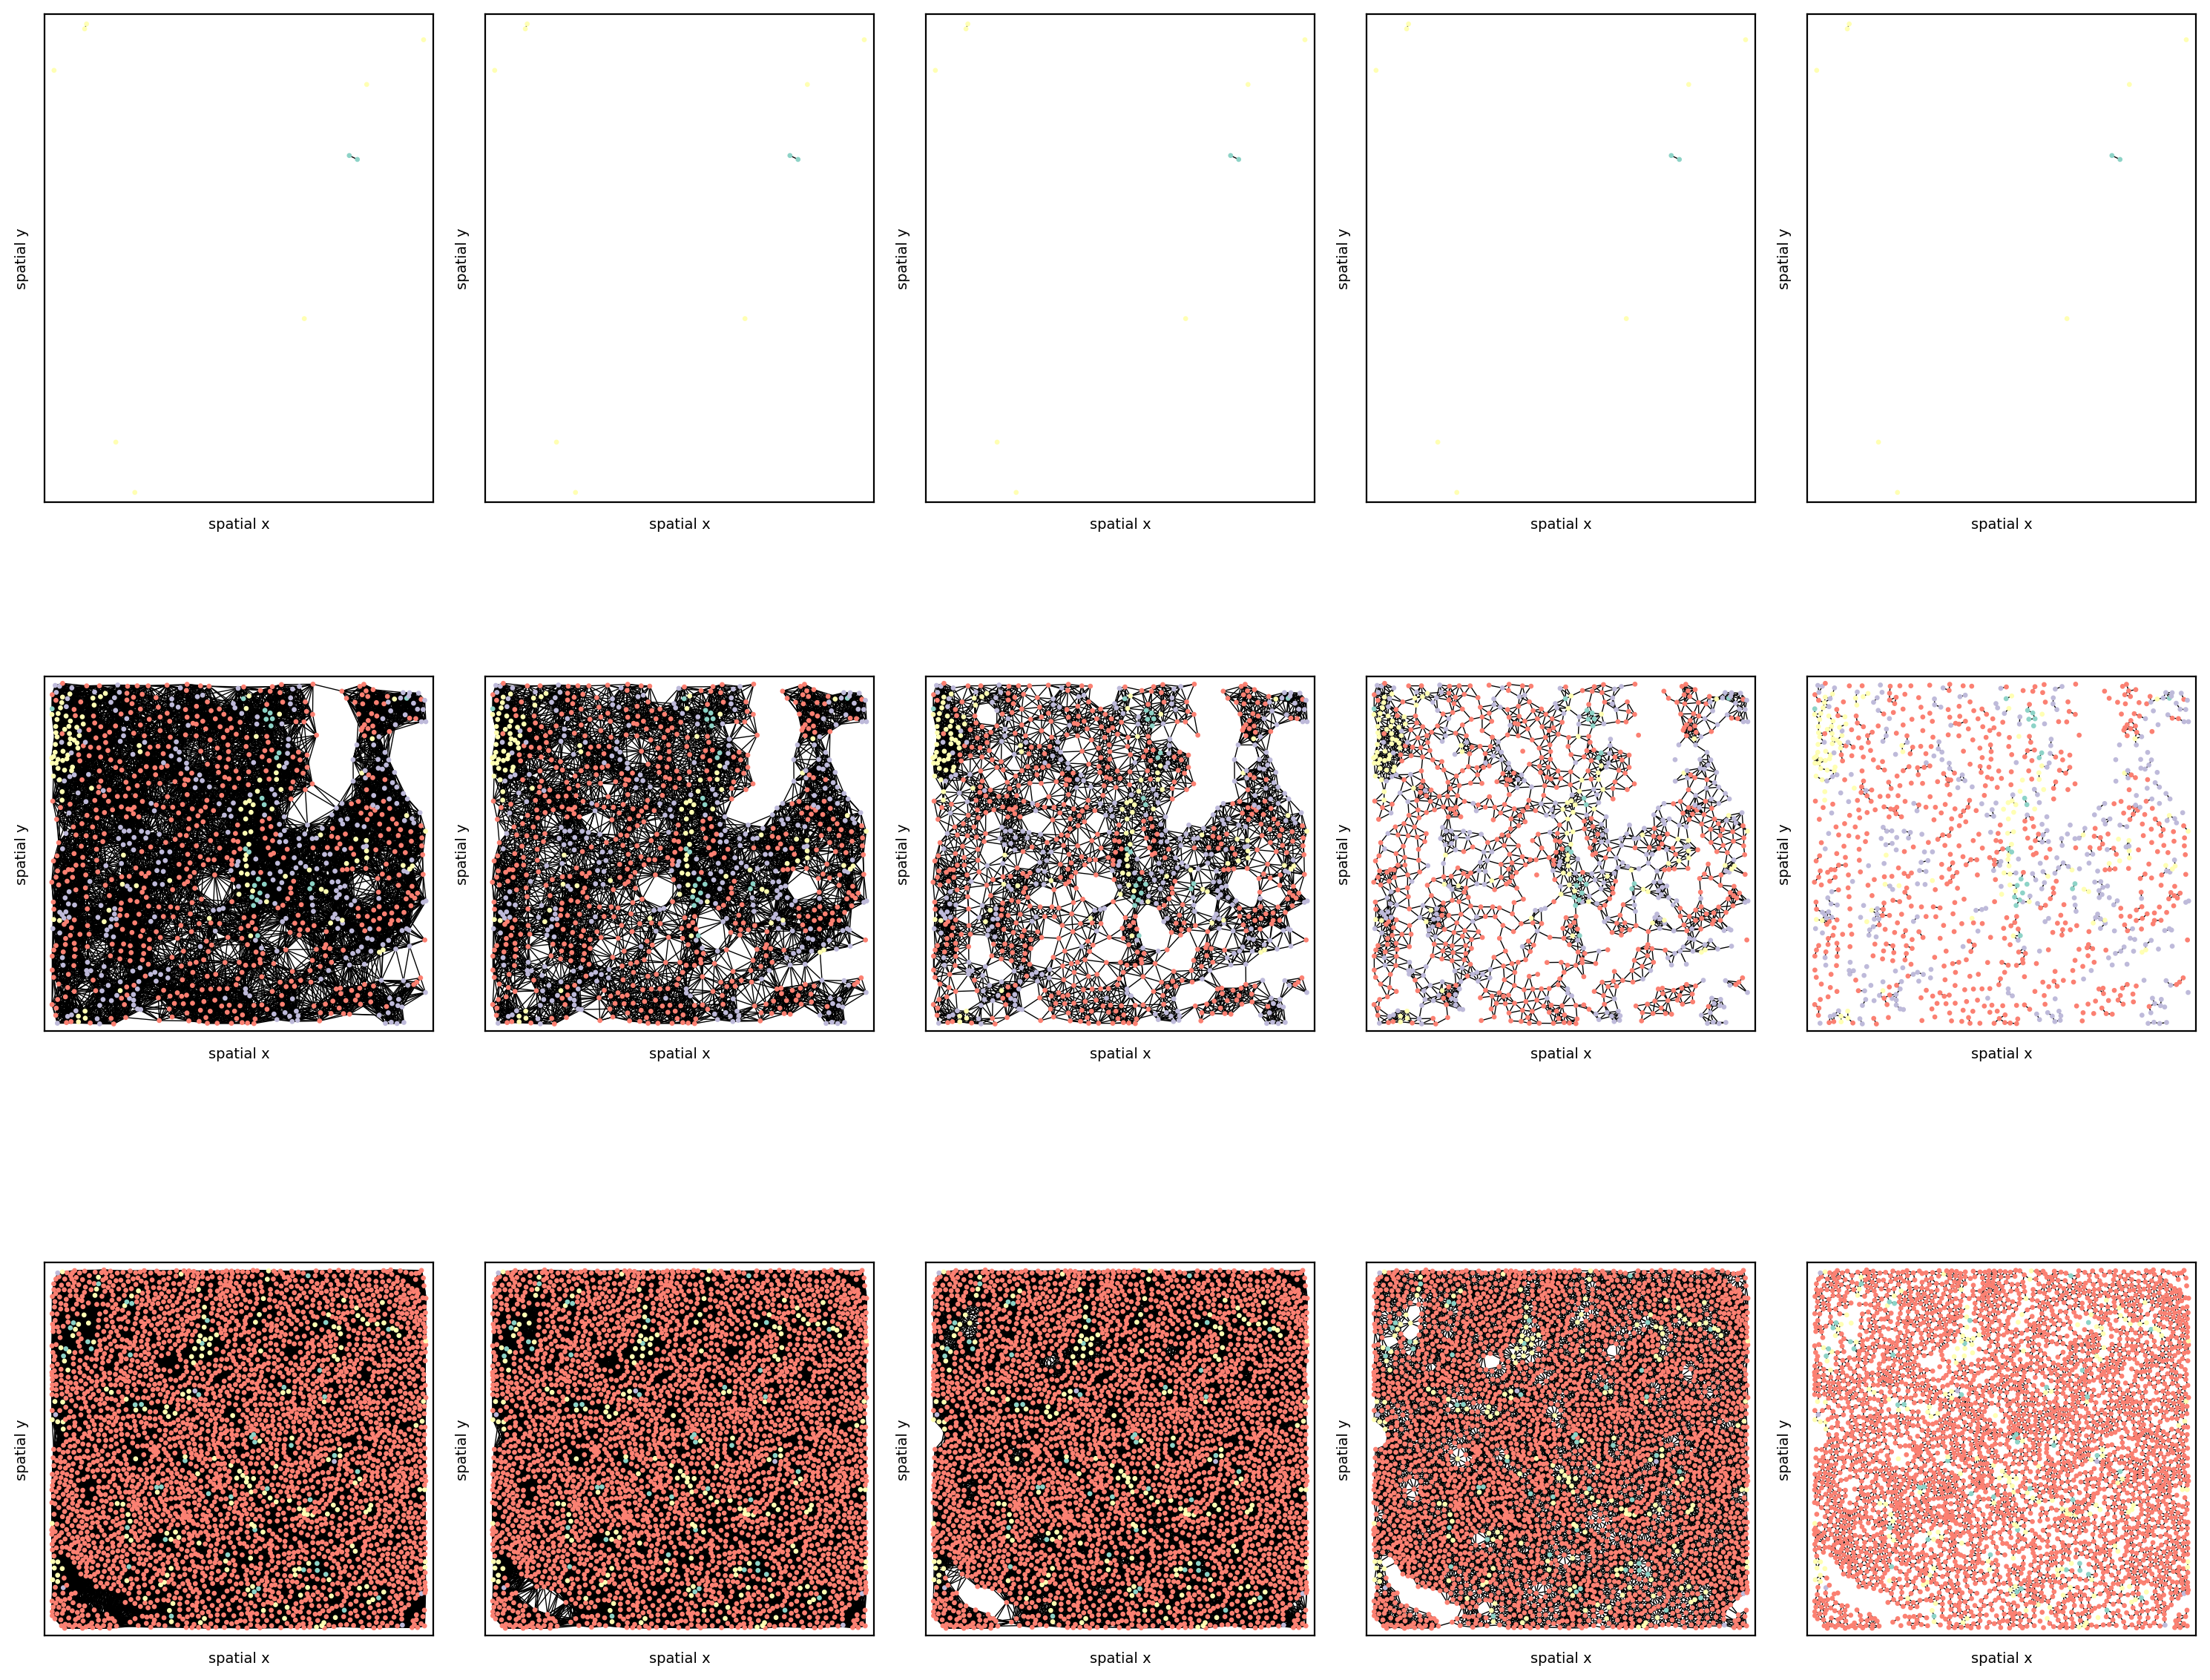

In [32]:
# Viuslaize radius graphs
fig, axs = plt.subplots(3, 5, figsize=(15, 15), dpi=200)

for i, spl in enumerate(spls):
    for j, radius in enumerate(radiuses):
        col_bar = True if j == 5 else False
        
        ath.pl.spatial(
            so, 
            spl, 
            'cell_type', 
            edges=True, 
            graph_key=f"radius_{radius}", 
            ax=axs[i][j], 
            cbar=col_bar,
            node_size=2,
            set_title=False
        )

In [33]:
contact_cfg = get_default_config(
    builder_type = 'contact'
)

In [34]:
contact_cfg

{'builder_type': 'contact',
 'builder_params': {'dilation_kernel': 'disk',
  'radius': 4,
  'include_self': True},
 'coordinate_keys': ['x', 'y'],
 'mask_key': 'cellmasks',
 'build_and_attribute': False,
 'build_concept_graph': False}

In [35]:
radiuses = [30, 20, 10, 5, 2]

for spl in spls:
    for radius in radiuses:
        contact_cfg["builder_params"]["radius"] = radius
        ath.graph.build_graph(so, 
            spl, 
            builder_type='contact',
            config=contact_cfg, 
            key_added=f"contact_{radius}"
        )

100%|██████████| 3671/3671 [00:43<00:00, 83.92it/s]


In [36]:
# Viuslaize contact graphs
fig, axs = plt.subplots(3, 5, figsize=(15, 12), dpi=200)

for i, spl in enumerate(spls):
    for j, radius in enumerate(radiuses):
        col_bar = True if j == 5 else False
        
        ath.pl.spatial(
            so, 
            spl, 
            'cell_type', 
            edges=True, 
            graph_key=f"contact_{radius}", 
            ax=axs[i][j], 
            cbar=col_bar,
            node_size=2,
            set_title=False
        )